# Project 1 - Reinforcement Learning - MO436

#### Group: 
* Arthur Guazzelli (231674)
* Elian Laura (265685)
* Iury Cleveston (230216)
* Maria Tejada (197488)

## 1) Environment Description

In this project, we used the FrozenLake 8x8 environment from OpenAi Gym. This environment is represented as a grid with 8x8 tiles, where the goal is to cross the entire board without falling into ice holes. Frozen Lake is an episodic environment, where the initial state (S) is in the top-left position, and the terminal states are either the ice holes (H) or the final goal in the bottom-right tile (G). The ice holes are spread across the board, and the agent should find a path to the goal through frozen tiles (F); the reward of value of 1 is only given at this point.

<br>
<div>
<center><img src="frozenLake.png" width="180"/></center>
<center>Figure 1 - Frozen Lake Grid.</center>
</div>


The current state is represented as a single number corresponding to the tile where the agent has entered, ranging from 0 to 63; therefore, this environment is discrete and partial observable. The possible actions are moving north, east, south, and west. Frozen Lake is presented in a deterministic and stochastic way; the difference is in the slippery ice, where the agent might slip and reach an unexpected state.

The ice holes are close to feasible paths to the goal; also, the reward is delayed until the end. These characteristics make Frozen Lake a challenging environment, especially in the stochastic version, where the dynamics are unpredictable.

Codes are available at https://github.com/thurbridi/mo436-project-1

In [1]:
import sys
sys.path.insert(0, '../src')

## 2) Monte Carlo Control (iury)

The Monte Carlo Agent was initialized with the state-action values $Q(s, a)$ equal to 0. We employed a step-size $\alpha_{t} = \frac{1}{N(s_{t},a_{t})}$, where $N(s_{t},a_{t})$ refers to the number of times action $a$ was selected from the state $s$.

The trade-off between exploration and exploitation was determined by an $\epsilon-greedy$ policy, where $\epsilon_{t} = \frac{N0}{N0+N(s_{t})}$; $N0$ is an hyperparameter, and $N(s_{t})$ is the number of times the state $s$ has been visited. 

In this project, we implemented two versions: tabular and linear approximation. Also, we searched for the best parameters using grid search, and we evaluated the solutions in the deterministic and stochastic environment.

The equation used for tabular Monte Carlo improvement is:

$Q(s,a) = Q(s,a) + \frac{1}{N(s,a)}(G_{t} - Q(s,a))$,

where $G_{t} = \sum \gamma^{T-1}R_{k,T}$, and $N(s,a) = N(s,a) + 1$

For policy evaluation, we used:

$\pi(s) = \mathrm{argmax} Q(s,a)$,

In [2]:
from monte_carlo_tabular import *
from monte_carlo_approximator import *

### 2.1) Tabular & Deterministic

The first experiment consisted in applying the Monte Carlo First Visit in the tabular and deterministic environment. Therefore, we used a grid search technique to find the best solution given the parameters defined as:

$\mathrm{N0} \in [0.1, 1, 10]$,

$\mathrm{gamma} \in [1, 0.9, 0.5, 0.1]$,

$\mathrm{episodes} \in [100, 1000]$


In [3]:
grid_search_tabular(stochastic=False)

      n0  gamma  episodes  win/loss (%)  elapsed time (s)
0    0.1    1.0     100.0         100.0          0.226304
1    1.0    1.0     100.0         100.0          0.189473
2   10.0    1.0     100.0           2.0          0.072398
3    0.1    0.9     100.0         100.0          0.126679
4    1.0    0.9     100.0         100.0          0.124684
5   10.0    0.9     100.0           2.0          0.089683
6    0.1    0.5     100.0         100.0          0.145805
7    1.0    0.5     100.0         100.0          0.095972
8   10.0    0.5     100.0           2.0          0.069440
9    0.1    0.1     100.0         100.0          0.108018
10   1.0    0.1     100.0         100.0          0.075810
11  10.0    0.1     100.0           2.0          0.064267
12   0.1    1.0    1000.0         100.0          0.421142
13   1.0    1.0    1000.0         100.0          0.392267
14  10.0    1.0    1000.0         100.0          1.148584
15   0.1    0.9    1000.0         100.0          0.294481
16   1.0    0.

In this experiment, we varied the $N0$, gamma, and episodes. The win/loss metric is defined as the percentage of wins from 100 games plays; the majority of executions returned 100\% of wins. Only the executions with $N0=10$ and with 100 episodes could not achieved maximum success, due to the excessive exploration. The elapsed time presented a consistent correlation with the number of episodes.

We selected the execution number 4 to be analyzed in detail as follows:

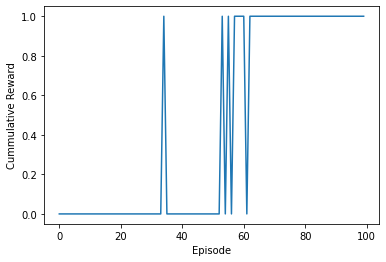

In [5]:
Q, env = train_tabular(stochastic=False, episodes=100, gamma=0.9, n0=1)

The cumulative discounted reward (G) by episode increased during training; the average variance has also decreased, which means the agent is learning a good policy. The exploration rate is initially set as $N0=1$; however, as the training continues, the states are being visited, and the agent started to select greedy actions, contributing to the cumulative reward's variance decrease in the end. 

The final board is shown below, where the agent was able to reach its goal:

In [13]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


We also reported the best state value ($V_*$) and the best policy ($\pi_*$), as follows:

In [14]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.11| 0.14| 0.00| 0.22| 0.26| 0.30| 0.00| 0.00|
------------------------------------------------
 0.00| 0.14| 0.17| 0.20| 0.09| 0.37| 0.41| 0.04|
------------------------------------------------
 0.00| 0.03| 0.03| 0.00| 0.24| 0.05| 0.49| 0.56|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.22| 0.60|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.18| 0.74|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.86|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 1.00|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00|
------------------------------------------------


In [15]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  r  |  s  |  r  |  r  |  r  |  s  |  l  |  s  |
------------------------------------------------
  r  |  r  |  r  |  n  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  r  |  n  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  n  |  s  |  r  |  l  |  l  |  n  |  s  |  s  |
------------------------------------------------
  n  |  r  |  s  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  s  |  n  |  r  |  l  |  n  |  l  |  s  |  s  |
------------------------------------------------
  r  |  l  |  n  |  s  |  n  |  r  |  l  |  s  |
------------------------------------------------
  l  |  s  |  s  |  r  |  s  |  l  |  l  |  n  |
------------------------------------------------


The policy is shown by state, where the greedy actions can be:
<ul>
    <li>n - north</li>
    <li>r - right</li>
    <li>s - south</li>
    <li>l - left</li>
</ul>

Observing the $V_*$ plot and the best policy $\pi_*$, we noted that the agent preferred to explore the top-right quadrant of the grid, mainly because the path seems less risky. In this sense, most of the actions are to go right and then south. The cumulative return (G) is appropriately assigned to the trajectory, being larger in the goal state, and decreasing its value until the initial state.

### 2.2) Tabular & Stochastic

The second experiment employed the same methodology as the first one. In this case, we turned on the environment slippery, which adds stochasticity. Similarly, we searched for the best solution using the grid search algorithm using the following parameters:

$\mathrm{N0} \in [1, 100, 1000, 10000]$,

$\mathrm{gamma} \in [1, 0.9, 0.1]$,

$\mathrm{episodes} \in [10000, 100000]$

This time we increased the number of episodes and the $N0$ constant to enable more exploration in the environment.

In [16]:
grid_search_tabular(stochastic=True)

         n0  gamma  episodes  win/loss (%)  elapsed time (s)
0       1.0    1.0   10000.0           7.0          5.432594
1     100.0    1.0   10000.0          28.0          7.623629
2    1000.0    1.0   10000.0          55.0          9.491570
3   10000.0    1.0   10000.0          36.0         12.016099
4       1.0    0.9   10000.0           1.0          5.742304
5     100.0    0.9   10000.0          12.0          8.934242
6    1000.0    0.9   10000.0          43.0          9.263228
7   10000.0    0.9   10000.0           2.0         10.051708
8       1.0    0.1   10000.0           4.0          7.212385
9     100.0    0.1   10000.0           0.0          8.766804
10   1000.0    0.1   10000.0           1.0         11.912093
11  10000.0    0.1   10000.0           2.0          9.833791
12      1.0    1.0  100000.0          13.0         63.864103
13    100.0    1.0  100000.0          26.0         96.923429
14   1000.0    1.0  100000.0          60.0        128.208909
15  10000.0    1.0  1000

However, when the environment is stochastic, the agent has enormous difficulties in learning a good policy. Half of the executions returned a success rate inferior to 10\%. Nevertheless, the other executions were promising, especially the numbers 14 and 2, with win rates of 60\% and 55\%, respectively. The elapsed time has dramatically increased, primarily due to the increase in the number of episodes. The best solution was achieved by providing intermediate exploration with $N0=1000$. Also, the discount factor significantly impacted the win rate; the best results were achieved using a rate greater than 0.9.

Now, we will analyze the solution number 2:

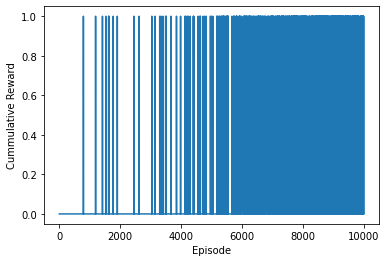

In [6]:
Q, env = train_tabular(stochastic=True, episodes=10000, gamma=1, n0=1000)

The cumulative discounted reward has a large variance due to the stochasticity. However, the agent can reach the goal state most of the time; as the training proceeds, the agent retrieves more rewards. Due to the unknown dynamics, the agent falls into the ice holes more frequently, even when selecting the appropriate action, as shown below:

In [10]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Following our methodology, we plot the state value ($V_*$) and the derived policy $\pi_*$.

In [7]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.05| 0.06| 0.06| 0.08| 0.08| 0.10| 0.14| 0.12|
------------------------------------------------
 0.05| 0.07| 0.06| 0.07| 0.08| 0.10| 0.11| 0.13|
------------------------------------------------
 0.02| 0.01| 0.02| 0.00| 0.05| 0.06| 0.14| 0.14|
------------------------------------------------
 0.01| 0.01| 0.00| 0.00| 0.01| 0.00| 0.14| 0.17|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.01| 0.07| 0.15| 0.23|
------------------------------------------------
 0.01| 0.00| 0.00| 0.00| 0.00| 0.05| 0.00| 0.35|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.04| 0.00| 0.59|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.25| 0.25| 0.50| 0.00|
------------------------------------------------


In [8]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  n  |  r  |  s  |  r  |  n  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  n  |  s  |  l  |
------------------------------------------------
  r  |  r  |  n  |  l  |  n  |  r  |  r  |  s  |
------------------------------------------------
  n  |  n  |  l  |  r  |  r  |  n  |  r  |  s  |
------------------------------------------------
  l  |  l  |  l  |  l  |  n  |  s  |  n  |  r  |
------------------------------------------------
  l  |  n  |  r  |  s  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  s  |  r  |  n  |  n  |  s  |  n  |  r  |
------------------------------------------------
  r  |  l  |  r  |  s  |  s  |  n  |  s  |  s  |
------------------------------------------------


The state value was properly determined; it increases as the agent approaches the goal state. However, a curious behavior has emerged; the agent attempts to stay close to the game's border most of the time. Also, the actions are chosen to exploit the stochastic dynamics of the environment, like going right instead of south. The policy makes the agent avoid the holes in the first place while expecting to reach the desired state through the game's stochasticity. Further, in the stochastic version, the agent has found alternative paths to the goal.

### 2.3) Linear Function Approximation & Deterministic

The third experiment consisted of applying a linear function approximator (LFA) to avoid a complete state representation. In this sense, we aim to generalize to unseen states by using a linear combination of features, given as:

$w = w + \alpha_{t}[(G_{t} - x(S)^Tw)x(S)]$

$x(S) = RBF(\mathrm{current\_state}, \mathrm{mod\_state})$

The feature vector is generated by extracting several features to represent the state, such as the current state number and the mod state, which is the current state divided by their column number (8, considering the grid size). Twenty Radial Basis Functions (RBF) are employed to represent the state space; for this, we sampled 3000 states from the environment and fit the feature function. Then we used a linear combination of them to generate the policy. We also tested with polynomial feature functions; however, it has not provided good results.

In [4]:
grid_search_approximator(stochastic=False)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.100    1.0  0.9    1000.0     316.000000           0.0         36.047742
1   0.100    0.9  0.9    1000.0      39.957193           0.0         36.291694
2   0.100    0.1  0.9    1000.0       3.333333           0.0         33.191299
3   0.100    1.0  0.5    1000.0     438.000000           0.0         97.148110
4   0.100    0.9  0.5    1000.0      67.944745           0.0         66.153031
5   0.100    0.1  0.5    1000.0       5.555556           0.0         45.912886
6   0.100    1.0  0.1    1000.0     449.000000           0.0        214.719067
7   0.100    0.9  0.1    1000.0      77.002038           0.0        130.207591
8   0.100    0.1  0.1    1000.0       1.111111           0.0        242.903670
9   0.010    1.0  0.9    1000.0     338.000000           0.0         27.421843
10  0.010    0.9  0.9    1000.0      59.462351           0.0         24.824259
11  0.010    0.1  0.9    1000.0       3.333333      

The grid search has found a few executions with optimal policy, mainly those where alpha is 0.001. Also, the agent could only reach the goal with gamma greater than 0.9 and epsilon lower than 0.5. These parameters generate a policy that enables the agent to keep most of the reward through time and explore the policy more than explore the environment. We understand that the alpha and episodes play a significant role in the convergence since the agent requires more episodes to reach a reasonable solution when alpha is small. The time required to convergence is varied because sometimes the agent keeps executing inappropriate actions, which do not result in motion.

Another important metric is the accumulated reward during training. We noted that the agent could reach the goal during training and accumulate rewards many times; however, this does not always translate into a good policy. We hypothesize that the agent can accumulate reward by exploring the epsilon-greedy actions in training, but in the test, the agent gets stuck when only greedy actions are selected.  

We select one of our the best execution to analyse in detail, as shown:

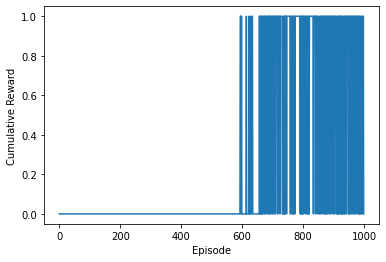

In [10]:
Q, env = train_approximator(stochastic=False, episodes=1000, gamma=1, alpha=0.001, eps=0.1)

In [15]:
play(env, Q)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF

Observing the cumulative reward plot shows that the agent is improving its policy since the accumulated reward increases as the training ends. The gameplay also confirmed that the agent could generalize an action-value function to determine the best policy in each state. To evaluate the policy numerically, we printed the state values and policy:

In [11]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.5272| 0.6534| 0.7032| 0.7129| 0.7054| 0.6594| 0.5331| 0.5442|
------------------------------------------------
 0.5189| 0.6147| 0.6649| 0.6869| 0.6736| 0.5974| 0.5052| 0.7039|
------------------------------------------------
 0.4710| 0.5572| 0.5940| 0.5900| 0.5480| 0.4647| 0.6036| 0.7996|
------------------------------------------------
 0.4009| 0.4539| 0.4487| 0.4169| 0.3810| 0.3888| 0.6315| 0.8379|
------------------------------------------------
 0.2728| 0.2725| 0.2470| 0.2386| 0.2501| 0.3643| 0.6216| 0.8601|
------------------------------------------------
 0.0729| 0.0557| 0.0701| 0.1189| 0.1580| 0.3336| 0.6181| 0.8680|
------------------------------------------------
-0.0093|-0.0059| 0.0033| 0.0349| 0.1117| 0.3309| 0.6105| 0.8222|
------------------------------------------------
-0.0205|-0.0150|-0.0077| 0.0013| 0.1113| 0.3269| 0.5557| 0.7101|
------------------------------------------------


In [12]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  r  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  r  |  s  |  s  |  s  |  s  |
------------------------------------------------
  l  |  l  |  n  |  n  |  s  |  s  |  s  |  s  |
------------------------------------------------


The Monte Carlo Control with Linear Function Approximation (LFA) provided an optimal policy most of the time. Observing the best state values ($V_*$) and best policy ($\pi_*$), we noted that the agent can reach the goal following the learned policy. The greedy actions are only going right and then south, which is optimal. In this sense, the LFA generalized to unseen states.

### 2.4)  Linear Function Approximation & Stochastic

The last experiment with MC Linear Function Approximation is employed in the stochastic environment, and a grid search determines the best parameters. In this case, we also used an epsilon of 0.1 in the test to make the agent free of getting stuck; if only greedy actions are selected, the percentage of wins gets a maximum value of 6\%.

In [3]:
grid_search_approximator(stochastic=True)

    alpha  gamma  eps  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.010    1.0  0.5   10000.0     725.000000           0.0        654.040878
1   0.010    0.9  0.5   10000.0     325.896776           6.0        730.698742
2   0.010    0.1  0.5   10000.0      45.555556           0.0        812.738182
3   0.010    1.0  0.1   10000.0    4953.000000           0.0       1718.217440
4   0.010    0.9  0.1   10000.0     276.264654           0.0        958.625169
5   0.010    0.1  0.1   10000.0     147.777778           0.0       2177.223560
6   0.001    1.0  0.5   10000.0    7627.000000          48.0        587.652399
7   0.001    0.9  0.5   10000.0     295.219508           0.0        715.200193
8   0.001    0.1  0.5   10000.0      17.777778           0.0        724.436488
9   0.001    1.0  0.1   10000.0  126270.000000          20.0       8116.390173
10  0.001    0.9  0.1   10000.0    1408.655753           0.0       1096.665400
11  0.001    0.1  0.1   10000.0     147.777778      

The stochastic environment presented several nonlinearities, which made the solutions problematic. The best solution found in the test presented 48\% of wins, while most of them could not achieve any victory. The time for training also increased dramatically, probably due to the novel dynamics, which made the agent perform indefinitely actions that did not result in motion.

We selected the best solution to be analyzed in detail:

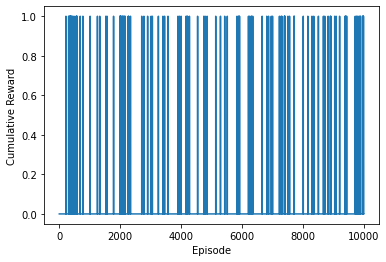

In [4]:
Q, env = train_approximator(stochastic=True, episodes=10000, alpha=0.001, gamma=1, eps=0.5)

In [5]:
env.render()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [6]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.0496| 0.0664| 0.0690| 0.0727| 0.0788| 0.0815| 0.1033| 0.1289|
------------------------------------------------
 0.0556| 0.0679| 0.0644| 0.0731| 0.0783| 0.0943| 0.1308| 0.1756|
------------------------------------------------
 0.0523| 0.0575| 0.0515| 0.0604| 0.0741| 0.1112| 0.1749| 0.2419|
------------------------------------------------
 0.0355| 0.0400| 0.0396| 0.0445| 0.0708| 0.1291| 0.2172| 0.3030|
------------------------------------------------
 0.0124| 0.0239| 0.0316| 0.0372| 0.0680| 0.1454| 0.2530| 0.3507|
------------------------------------------------
-0.0082| 0.0095| 0.0206| 0.0249| 0.0669| 0.1604| 0.2780| 0.3743|
------------------------------------------------
-0.0267|-0.0091| 0.0033| 0.0099| 0.0696| 0.1712| 0.2837| 0.3648|
------------------------------------------------
-0.0465|-0.0306|-0.0135| 0.0013| 0.0729| 0.1696| 0.2635| 0.3233|
------------------------------------------------


In [7]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  l  |  l  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  s  |  r  |  r  |  r  |  r  |
------------------------------------------------


Similarly, when the environment is stochastic, the agent has much more difficulty executing the appropriate actions. In this case, the agent tries to hack the environment by staying close to the game's border in an attempt to avoid the ice holes. Also, the nonlinearities made the linear function approximation complex; although the RBF covered the whole grid, the linear combinations could not correctly assign the credits; some actions are not optimal. 

## 3) Q-learning

## 4) SARSA(λ) - (Maria e Arthur)

### Elegibility Traces

The first term to be clear about is the **eligibility trace** that unifies the temporal-difference (TD) and Monte Carlo (MC) methods, in addition to offering the advantages over the $n$-steps TD methods. The trace-decay parameter $\lambda \in [0,1]$, common to methods that use eleigility traces, controls the rate at which the traces vanish. 
When $\lambda=1$ the algorithm functions like Monte Carlo, while at $\lambda=0$ the algorithm functions like one-step TD methods. The benefits over $n$-steps methos are:

1. Only a single trace vector must be kept in memory instead of $n$ feature vectors
2. Learning can take place immediately after executing an action instead of being delayed for $n$ steps.

Most TD methods can make use of eleigibility traces to obtain the advantes mentioned above. The $\lambda$-return:

<br><center>
$G_t^{\lambda} = (1-\lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_{t:t+n}$
</center>

### Difference between Q-learning and SARSA

Q-learning has a close relative called SARSA (for State-Action-Reward-State-Action). The update rule for SARSA is:


<br><center>
$Q(s,a) = Q(s,a) + \alpha(R(s) + \gamma Q(s', a') - Q(s,a))$,
</center>
    
where $a'$ is the action actually taken in state $s'$. The rule is applied at the end of each $s, a, r, s', a'$. 

The difference from Q-learning is quite subtle: whereas Q-learning backs up the best Q-values from the state reached in the observed transition, SARSA waits until an action is actually taken and backs up the Q-value for that action. Now, for a greedy agent that always takes the action with best Q-value, the two algorithms are identical. When exploration is happening however, they differ significantly. Because Q-learning uses the best Q-value, it pays no attention to the actual policy being followed - it is an **off-policy** learning algorithm, whereas SARSA is an **on-policy** algorithm. 

The idea in Sarsa($\lambda$) is to apply the TD($\lambda$) prediction method to state-action pairs rather than to states. Obviously, then, we need a trace not just for each state, but for each state-action pair. Let $e_t(s,a)$ denote the trace for state-action pair $s,a$. Otherwise, the method is just TD($\lambda$), substituting state-action variables for estate variables $Q(s,a)$ for $V(s)$ and $e_t(s,a)$ for $e_t(s)$:

<br><center>
$Q_{t+1}(s,a) = Q_t(s,a) + \alpha \delta_t e_t(s,a)$
</center>
    
where

$\delta_t = r_{t+1} + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t, a_t)$

There are two methods of $e_t$: accumulate and replace. The first version is:

<br><center>
$e_t(s,a) =
  \begin{cases}
    \gamma \lambda e_{t-1}(s,a) + 1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a)      & \quad \text{otherwise}
  \end{cases}
$
</center>

The replace method is given by:

<br><center>
$e_t(s,a) =
  \begin{cases}
    1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a) & \quad \text{otherwise}
  \end{cases}
$
</center>

For this project we have made a tabular and function approximation versions.  

### Approximation Linear Function

Each one made two different ways of representing the features for the approximation function.

The first way of the features is determined by the discretezication of a vector with $128$ positions in binary. In which the first $64$ positions correspond to the state that is currently. And the next $64$ positions are the next state that is determined by the action that is passed in the function.

The second way depends on the extraction of the row and column of the position based on the current state and the next state simulated by the given action. These values are then combined into polynomials that are used as the feature vector. Normalization based on the grid size was also applied to keep the gradients from exploding. 
The final polynomial used for the current state (after extracting the row and column index, row, col) was:

<br><center>
$[\text{row}_i,\; \text{col}_i,\; \text{row}_i*\text{col}_i,\; \text{row}_i^2,\; \text{col}_i^2,\; \text{row}_i^3,\; \text{col}_i^3,\; \text{row}_i^4,\; \text{col}_i^4]$
</center>

The full feature vector is the concatenation of the polynomial for the current state, the same polynomial but for the next state based on the action and a bias term. The array total is $19$ features, we note that this representation is much more memory efficient than the tabular implementation. 

We note that this approach hard-coded environment dynamics into the features

In [3]:
from sarsa_lambda import *
from sarsa_lambda_approx import *
from sarsa_lambda_approx2 import *

### 4.1) Tabular & Deterministic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.


In [3]:
report_sarsa(stochastic = False)

/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:82: RuntimeWarning: overflow encountered in double_scalars
  delta = reward + discount*Q[next_state][next_action] - Q[state][action]
/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:88: RuntimeWarning: invalid value encountered in multiply
  Q[s][:] += alpha * delta * E[s][:]


,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.0,0.01,accumulate,99.0,15.531965
1,1000,0.99,0.01,0.0,0.01,replace,0.0,46.984160
2,1000,0.99,0.01,0.5,0.01,accumulate,100.0,8.389721
3,1000,0.99,0.01,0.5,0.01,replace,99.0,9.319530
4,1000,0.99,0.01,0.9,0.01,accumulate,100.0,20.262969
5,1000,0.99,0.01,0.9,0.01,replace,98.0,6.940933
6,1000,0.99,0.01,1.0,0.01,accumulate,0.0,29.145828
7,1000,0.99,0.01,1.0,0.01,replace,97.0,13.450243
8,1000,0.99,0.01,0.0,0.05,accumulate,92.0,29.343748
9,1000,0.99,0.01,0.0,0.05,replace,0.0,24.052486


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defined as the winning percentage of 100 games played; most executions returned a great $90\%$ win value. We observe that the worst results are with the replaced type and $\lambda$ close to 0.

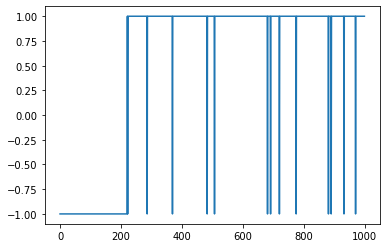

In [5]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
Q_sarsa, E_sarsa, stats, _ = sarsa_lambda(env, 1000, 0.99, 0.01, 0.5, 0.01, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 1000 training episodes. We observe that most of them have a positive reward.

In [6]:
generate_stats_sarsa(env, Q_sarsa, E_sarsa, 1, 0.99, 0.01, 0.5, 0.01, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFF

1.0

The report of the te best state value and the best policy, as follows:

In [7]:
print_state_values_sarsa(Q_sarsa)


			 State Value
--------------------------------------------------------
  0.36|  0.41| -0.01| -0.02|  0.72|  0.77| -0.00| -0.02|
--------------------------------------------------------
 -0.03|  0.47|  0.53|  0.60|  0.66|  0.81|  0.86| -0.01|
--------------------------------------------------------
 -0.02| -0.01| -0.03|  0.00| -0.01| -0.00|  0.90| -0.01|
--------------------------------------------------------
 -0.04| -0.03| -0.04| -0.03| -0.02|  0.00|  0.95|  0.04|
--------------------------------------------------------
 -0.03| -0.03| -0.03|  0.00| -0.01| -0.01|  0.98|  1.00|
--------------------------------------------------------
 -0.03|  0.00|  0.00|  0.00| -0.00| -0.00|  0.00|  1.02|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  1.04|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|
--------------------------------------------------------


In [8]:
print_policy_sarsa(Q_sarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |
------------------------------------------------
  ↓  |  →  |  →  |  →  |  ↑  |  →  |  ↓  |  ←  |
------------------------------------------------
  →  |  ↑  |  ←  |  ←  |  →  |  →  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  →  |  ↓  |  ←  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  →  |  ↓  |  →  |  ↓  |
------------------------------------------------
  ↓  |  ←  |  ←  |  ↓  |  →  |  ↑  |  ←  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  ←  |  →  |  ←  |  ↓  |
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  ↓  |  ↓  |  ←  |  ←  |
------------------------------------------------


It is observed that the most productive path is to go all the way to the right and then go down. And we observe in most of the ways it is to go one of the edges and then go to the right and down.

### 4.2) Tabular & Stochastic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.

In [4]:
report_sarsa(stochastic = True)

,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.01,0.01,accumulate,32.0,35.823933
1,1000,0.99,0.01,0.01,0.01,replace,0.0,22.258200
2,1000,0.99,0.01,0.50,0.01,accumulate,64.0,36.563314
3,1000,0.99,0.01,0.50,0.01,replace,8.0,28.171000
4,1000,0.99,0.01,0.90,0.01,accumulate,58.0,28.701306
5,1000,0.99,0.01,0.90,0.01,replace,35.0,28.099315
6,1000,0.99,0.01,1.00,0.01,accumulate,0.0,13.269087
7,1000,0.99,0.01,1.00,0.01,replace,43.0,31.653745
8,1000,0.99,0.01,0.01,0.05,accumulate,19.0,37.123757
9,1000,0.99,0.01,0.01,0.05,replace,0.0,18.582086


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $78.0\%$, with this parameters:

* $\text{episode} \in [5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.05]$,
* method: accumulate

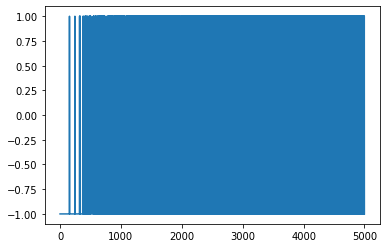

In [9]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
Q_ssarsa, E_ssarsa, stats, _ = sarsa_lambda(env, 5000, 0.99, 0.01, 0.5, 0.05, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 5000 training episodes. We observe that most of them have a positive reward.

The report of the te best state value and the best policy, as follows:

In [10]:
generate_stats_sarsa(env, Q_ssarsa, E_ssarsa, 1, 0.99, 0.01, 0.5, 0.05, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
F

1.0

In [11]:
print_state_values_sarsa(Q_ssarsa)


			 State Value
--------------------------------------------------------
  0.03|  0.03|  0.06|  0.08|  0.11|  0.14|  0.21|  0.24|
--------------------------------------------------------
  0.03|  0.03|  0.04|  0.06|  0.09|  0.14|  0.20|  0.25|
--------------------------------------------------------
 -0.03| -0.04| -0.08|  0.00| -0.05|  0.07|  0.16|  0.28|
--------------------------------------------------------
 -0.09| -0.12| -0.22| -0.43| -0.26|  0.00|  0.21|  0.32|
--------------------------------------------------------
 -0.13| -0.23| -0.37|  0.00| -0.22| -0.09|  0.17|  0.40|
--------------------------------------------------------
 -0.14|  0.00|  0.00| -0.14| -0.21| -0.20|  0.00|  0.56|
--------------------------------------------------------
 -0.11|  0.00| -0.05| -0.04|  0.00| -0.12|  0.00|  0.78|
--------------------------------------------------------
 -0.07| -0.09| -0.07|  0.00| -0.02| -0.02|  0.00|  0.00|
--------------------------------------------------------


In [12]:
print_policy_sarsa(Q_ssarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  →  |  →  |  ↑  |  ↓  |  →  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  ↑  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  ←  |  →  |  ↑  |  ↓  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ←  |  ←  |  →  |  →  |
------------------------------------------------
  ←  |  ↑  |  →  |  ←  |  →  |  ↓  |  ↑  |  →  |
------------------------------------------------
  ←  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |  →  |
------------------------------------------------
  →  |  ←  |  ←  |  ↑  |  ←  |  ←  |  ←  |  →  |
------------------------------------------------
  ←  |  ↑  |  ↓  |  ←  |  →  |  →  |  →  |  ←  |
------------------------------------------------


### 4.3) Linear Function Approximation & Deterministic


#### 4.3.1) First version (128 features)

A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.

In [3]:
report_sarsa_approx(False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,98.0,33.800815
1,15000.0,0.99,0.001,0.50,0.01,98.0,32.709157
2,15000.0,0.99,0.001,0.90,0.01,100.0,32.868252
3,15000.0,0.99,0.001,1.00,0.01,98.0,30.832365
4,20000.0,0.99,0.001,0.01,0.01,99.0,42.008074
5,20000.0,0.99,0.001,0.50,0.01,98.0,39.952675
6,20000.0,0.99,0.001,0.90,0.01,97.0,40.748318
7,20000.0,0.99,0.001,1.00,0.01,99.0,40.821783
8,15000.0,0.99,0.010,0.01,0.01,96.0,33.965552
9,15000.0,0.99,0.010,0.50,0.01,98.0,35.815818


It is observed that it has greater loss when the learning rate ($\alpha$) is at $0.1$. On the other hand, we have quite a bit of convergence when $\alpha$ is very small.

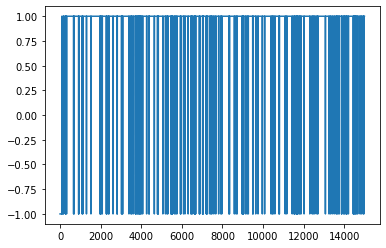

In [4]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
w_dlfsarsa, stats = sarsa_lambda_approx(env, 15000, 0.99, 0.001, 0.9, 0.01)
plt.plot(stats)
plt.show()

In [6]:
generate_stats_sarsa_approx(env, w_dlfsarsa, 1, 0.99, 0.001, 0.9, 0.01, True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFF

1.0

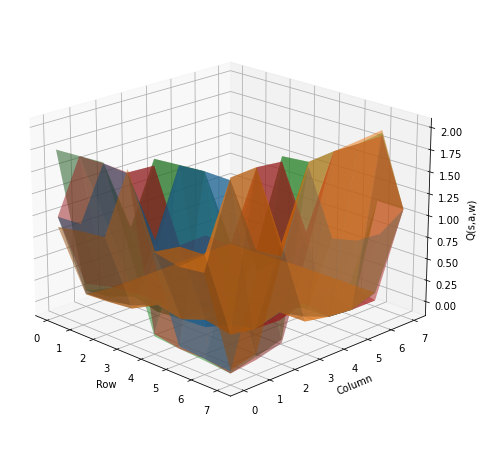

<Figure size 432x288 with 0 Axes>

In [5]:
draw_feature_sarsa_lambda_approx(env, w_dlfsarsa)

#### 4.3.2) Second version (19 features)

We testeed the reifnorcement learning agent with every combination of the following parameters:
    
* $\text{episode} \in [1500, 2000]$,
* $\gamma \in [1.0]$,
* $\alpha \in [0.01, 0.001, 0.00001]$,
* $\lambda \in [0.0, 0.4, 0.6, 1.0]$,
* $\epsilon \in [0.01]$.

In [3]:
report_sarsa_approx2(False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.01000,0.0,0.01,100.0,4.999290
1,1500.0,1.0,0.01000,0.4,0.01,100.0,5.310168
2,1500.0,1.0,0.01000,0.6,0.01,100.0,5.008601
3,1500.0,1.0,0.01000,1.0,0.01,100.0,6.298081
4,2000.0,1.0,0.01000,0.0,0.01,100.0,5.966104
5,2000.0,1.0,0.01000,0.4,0.01,100.0,5.962715
6,2000.0,1.0,0.01000,0.6,0.01,100.0,5.963825
7,2000.0,1.0,0.01000,1.0,0.01,100.0,11.004276
8,1500.0,1.0,0.00100,0.0,0.01,100.0,5.375140
9,1500.0,1.0,0.00100,0.4,0.01,100.0,5.341564


For the deterministic, we observe multiple configurations obtained found the optimal policy. To go into details, we train one such configuration again to obtain the model parameters.

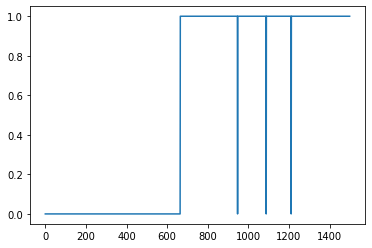

In [6]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
np.random.seed(42)
random.seed(42)
env.seed(42)
w_dlfsarsa2, stats = sarsa_lambda_approx2(env, 1500, alpha=1e-5, epsilon=0.01, discount=1.0, trace_decay=0.6)
plt.plot(stats)
plt.show()

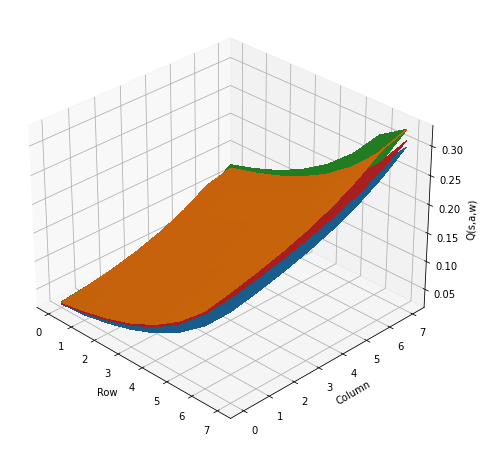

In [17]:
fig = plot_action_value2(w_dlfsarsa2)

### 4.4) Linear Function Approximation & Stochastic


#### 4.4.1) First version (128 features)

A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.


In [4]:
report_sarsa_approx(True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,54.0,270.128492
1,15000.0,0.99,0.001,0.50,0.01,83.0,218.299809
2,15000.0,0.99,0.001,0.90,0.01,69.0,226.250795
3,15000.0,0.99,0.001,1.00,0.01,79.0,186.460935
4,20000.0,0.99,0.001,0.01,0.01,48.0,344.313794
5,20000.0,0.99,0.001,0.50,0.01,81.0,300.322588
6,20000.0,0.99,0.001,0.90,0.01,75.0,313.826838
7,20000.0,0.99,0.001,1.00,0.01,74.0,263.719175
8,15000.0,0.99,0.010,0.01,0.01,76.0,177.484497
9,15000.0,0.99,0.010,0.50,0.01,83.0,222.260945


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $85.0\%$, with this parameters:

* $\text{episode} \in [20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.01]$.

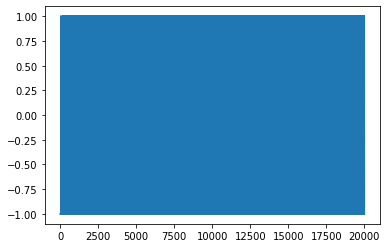

In [18]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
w_slfsarsa, stats = sarsa_lambda_approx(env, 20000, 0.99, 0.010, 0.50, 0.01)
plt.plot(stats)
plt.show()

In [82]:
generate_stats_sarsa_approx(env, w_slfsarsa, 1, 0.99, 0.010, 0.50, 0.01, True)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
F

1.0

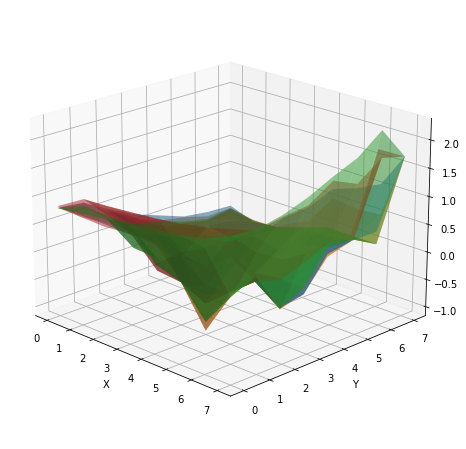

<Figure size 432x288 with 0 Axes>

In [83]:
draw_feature_sarsa_lambda_approx(env, w_slfsarsa)

#### 4.4.2) Second version (19 features)

We testeed the reifnorcement learning agent with every combination of the following parameters:
    
* $\text{episode} \in [1500, 2000]$,
* $\gamma \in [1.0]$,
* $\alpha \in [0.01, 0.001, 0.00001]$,
* $\lambda \in [0.0, 0.4, 0.6, 1.0]$,
* $\epsilon \in [0.01]$.

In [19]:
report_sarsa_approx2(True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,1500.0,1.0,0.01000,0.0,0.01,0.0,7.623601
1,1500.0,1.0,0.01000,0.4,0.01,0.0,7.583965
2,1500.0,1.0,0.01000,0.6,0.01,0.0,7.527228
3,1500.0,1.0,0.01000,1.0,0.01,0.0,7.291639
4,2000.0,1.0,0.01000,0.0,0.01,8.0,9.648008
5,2000.0,1.0,0.01000,0.4,0.01,6.0,10.036719
6,2000.0,1.0,0.01000,0.6,0.01,6.0,10.112803
7,2000.0,1.0,0.01000,1.0,0.01,6.0,10.120188
8,1500.0,1.0,0.00100,0.0,0.01,0.0,7.771370
9,1500.0,1.0,0.00100,0.4,0.01,0.0,7.658334


The best was $8\%$ of wins with the following parameters:

* $\text{episode} \in [2000]$,
* $\gamma \in [1.0]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.0]$,
* $\epsilon \in [0.01]$.

In the figure below it was extended to more episodes and it was observed that the number of wins improved.

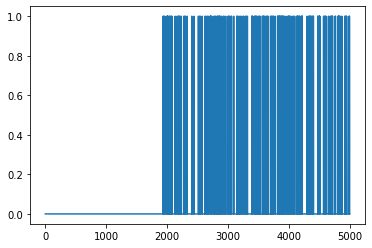

In [21]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
np.random.seed(42)
random.seed(42)
env.seed(42)
w_slfsarsa2, stats = sarsa_lambda_approx2(env, 5000, alpha=1e-2, epsilon=0.01, discount=1.0, trace_decay=0.0)
plt.plot(stats)
plt.show()

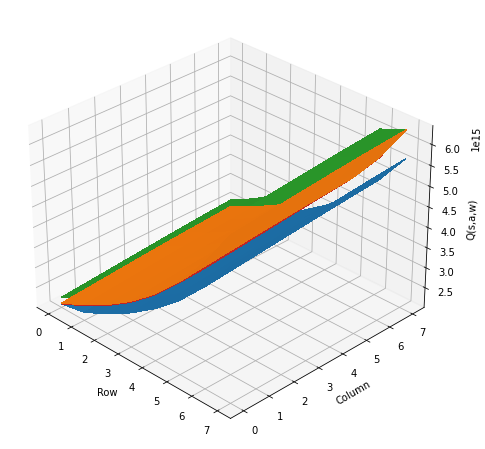

In [22]:
fig = plot_action_value2(w_slfsarsa2)